<a href="https://colab.research.google.com/github/csd-oss/vc-investmemt/blob/iss8/VC_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General preparation and GDrive conection

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt

# Uploiding info from [OECD](https://stats.oecd.org/Index.aspx?DataSetCode=VC_INVEST#)

In [0]:
vc_path = "https://raw.githubusercontent.com/csd-oss/vc-investmemt/master/VC_INVEST_06042020205501847.csv"
df = pd.read_csv(vc_path)
df

## Droping all not needed info

In [0]:
df = df.drop(columns=["Reference Period Code","Reference Period","Flag Codes","Flags","SUBJECT","Measure","Unit","Year","Subject","SUBJECT","Development stages"])
df

## Deviding data into 2 dataframes

In [0]:
df_usd = df.query('MEASURE == "USD_V"')
df_gdp = df.query('MEASURE == "SH_GDP"')

# Playing with USD data

## Creating filters

In [0]:
filt_total_us = (df_usd['STAGES'] == "VC_T") & (df_usd['LOCATION']== "USA")
filt_seed_us = (df_usd['STAGES'] == "SEED") & (df_usd['LOCATION']== "USA")
filt_start_us = (df_usd['STAGES'] == "START") & (df_usd['LOCATION']== "USA")
filt_later_us = (df_usd['STAGES'] == "LATER") & (df_usd['LOCATION']== "USA")

## Ploting US VC data 

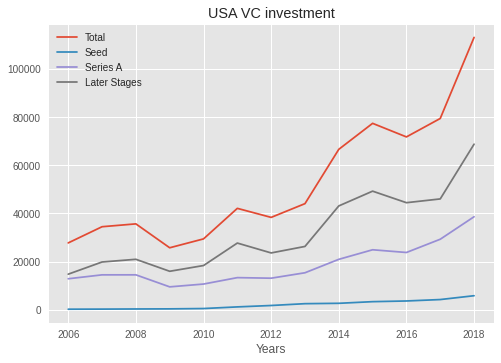

In [54]:
fig, ax = plt.subplots()
plt.style.use("ggplot")
ax.plot(df_usd.loc[filt_total_us].TIME, df_usd.loc[filt_total_us].Value, label = "Total")
ax.plot(df_usd.loc[filt_seed_us].TIME, df_usd.loc[filt_seed_us].Value, label = "Seed")
ax.plot(df_usd.loc[filt_start_us].TIME, df_usd.loc[filt_start_us].Value, label = "Series A")
ax.plot(df_usd.loc[filt_later_us].TIME, df_usd.loc[filt_later_us].Value, label = "Later Stages")

ax.set_xlabel("Years")
ax.set_label("Millions US$")
ax.set_title("USA VC investment")
ax.grid(True)
ax.legend()
plt.show()

# Playing with GDP data

In [0]:
filt_total_us = (df_gdp['STAGES'] == "VC_T") & (df_gdp['LOCATION']== "USA")
filt_seed_us = (df_gdp['STAGES'] == "SEED") & (df_gdp['LOCATION']== "USA")
filt_start_us = (df_gdp['STAGES'] == "START") & (df_gdp['LOCATION']== "USA")
filt_later_us = (df_gdp['STAGES'] == "LATER") & (df_gdp['LOCATION']== "USA")

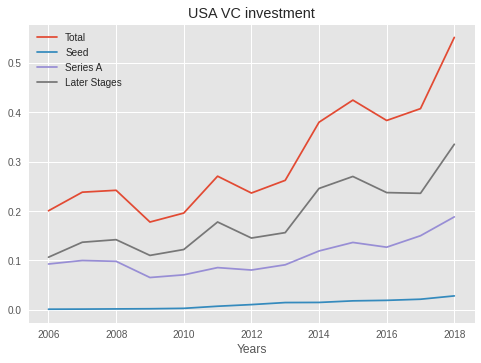

In [52]:
fig, ax = plt.subplots()
plt.style.use("ggplot")
ax.plot(df_gdp.loc[filt_total_us].TIME, df_gdp.loc[filt_total_us].Value, label = "Total")
ax.plot(df_gdp.loc[filt_seed_us].TIME, df_gdp.loc[filt_seed_us].Value, label = "Seed")
ax.plot(df_gdp.loc[filt_start_us].TIME, df_gdp.loc[filt_start_us].Value, label = "Series A")
ax.plot(df_gdp.loc[filt_later_us].TIME, df_gdp.loc[filt_later_us].Value, label = "Later Stages")

ax.set_xlabel("Years")
ax.set_label("%GDP")
ax.set_title("USA VC investment")
ax.grid(True)
ax.legend()
plt.show()

# Countries Yearly Sum

In [0]:
filt_total = (df_usd['STAGES'] == "VC_T") & (df_usd['TIME'] >= 2007) #not enoght data till 2007
df_usd[filt_total].groupby(['TIME'])['Value'].sum().plot()
plt.title('Total investment')
plt.ylabel('Millions USD')
plt.show()

# 2018 Pie Chart creation

In [0]:
filt_total_2018 = (df_usd['TIME']==2018)&(df_usd['STAGES']=='VC_T') 
filt_other = df_usd['Value'] > 2185.094678
pie_2018 = df_usd[filt_total_2018 & filt_other]
pie_2018.drop(columns=['STAGES','MEASURE','TIME','Unit Code','PowerCode Code','PowerCode'], inplace=True)
pie_2018

In [0]:
pie_2018.loc[1]=['OTH', 'Other', df_usd[filt_total_2018 & ~filt_other]['Value'].sum()]
pie_2018

In [0]:
expl = [0,0.1,0]
plt.figure(figsize=(40,10))
plt.pie(pie_2018['Value'], explode=expl)
plt.legend(pie_2018['Country'],fontsize='11',loc='best')
# plt.style.use('qqplot')
plt.title('2018 Total Investment',fontdict={'fontsize':'20'},loc='left')
plt.show()